In [84]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
 
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [27]:
final_dataframe = pd.read_csv('./data/sells_time_series.csv', index_col=0)
final_dataframe.index = pd.to_datetime(final_dataframe.index)

In [3]:
def return_series(df, name, key_words = None):
    """ 
    :param df: final_dataframe.
    :param name: nazwa wybrenej grupy (klastra) produktów
    :param key_words: key_words to lista słów dla których ma być wyszukany trend. Jeśli nie podacie nic, to domyślnie 
                      do key_words trafi nazwa produktów name
    """
    
    if key_words is None:
        key_words = [name]

    pytrends = TrendReq()
    pytrends.build_payload(kw_list = key_words, timeframe='2018-01-01 2021-02-28', geo='PL')
    trends = pytrends.interest_over_time().resample('MS').sum().drop('isPartial', axis = 1)
    
    sells = df[name]
    return sells, trends

In [53]:
sells, trends = return_series(df = final_dataframe, name ='lampa')

In [90]:
def run_ARIMA(data, order):
    
    # Tworzę model na podstawie 12 miesiący i przewiduję jeden miesiąc do przodu
    window = [i for i in range(len(data) - 12 + 1)]

    predictions = []
    for w in window:
        history = data.values[w: w+12]
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()[0]
        predictions.append(output)
    
    # Dodaje początkowe 12 wartości, żeby było łatwiej robić wykresy
    predictions = data.values[:12].tolist() + predictions
    return predictions

In [91]:
sells_preds = run_ARIMA(sells, (5,1,0))

C:\Users\PiotrGrabysz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\PiotrGrabysz\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PiotrGrabysz\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PiotrGrabysz\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [92]:
trends_preds = run_ARIMA(trends, (5,1,0))

C:\Users\PiotrGrabysz\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PiotrGrabysz\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


LinAlgError: LU decomposition error.

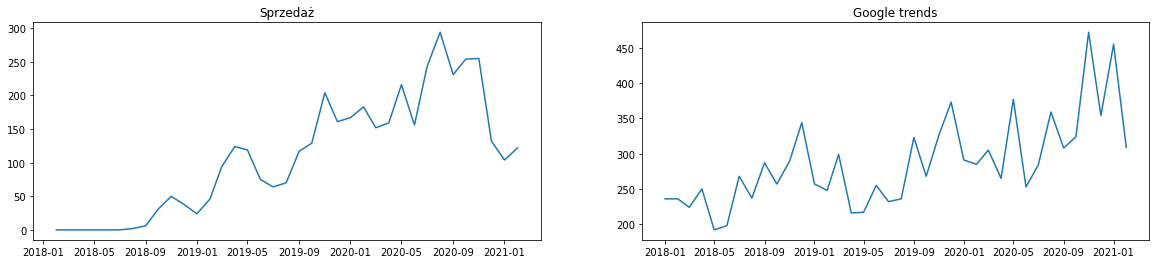

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (20,4))

ax[0].plot(sells)
ax[0].set_title('Sprzedaż')
ax[1].plot(trends)
ax[1].set_title("Google trends")
plt.show()

In [6]:
sells_decomposed = seasonal_decompose(sells, model='additive', period = 12)
trend_decomposed = seasonal_decompose(trends, model='additive', period = 12)

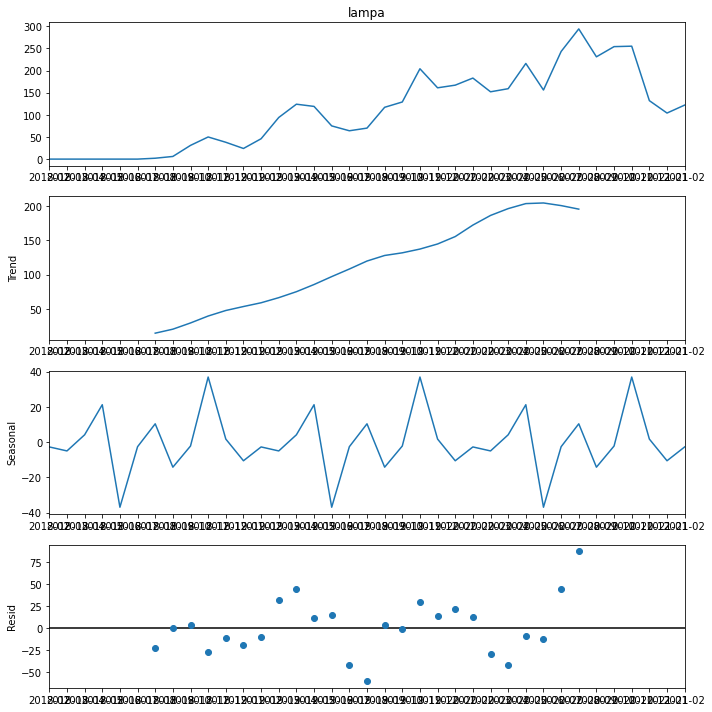

In [54]:
plt.rcParams.update({'figure.figsize': (10,10)})
sells_decompose.plot()
plt.show()

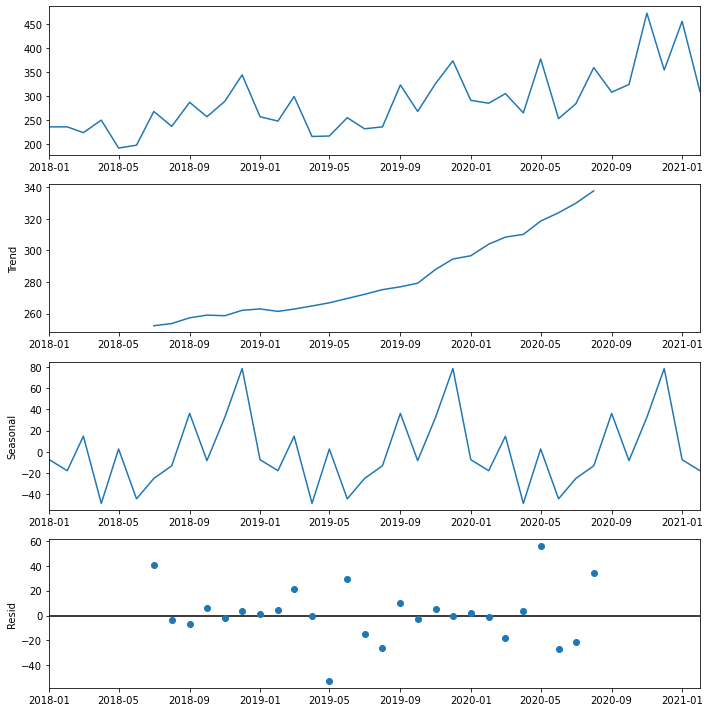

In [59]:
trend_decomposed.plot()
plt.show()

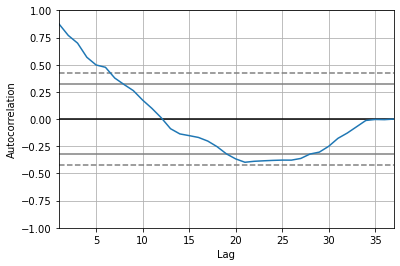

In [7]:
autocorrelation_plot(sells)
plt.show()

In [83]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from random import random

# contrived dataset
data = sells
# data = trends

# ostatnie 10 do predykcji
window = [i for i in range(26)]

predictions = []
for w in window:
    # history = data.values[w: w+12]
    # print(history)
    model = ARIMA(history, order=(5,2,0))
    model_fit = model.fit()
    output = model_fit.forecast()[0]
    predictions.append(output)

C:\Users\PiotrGrabysz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


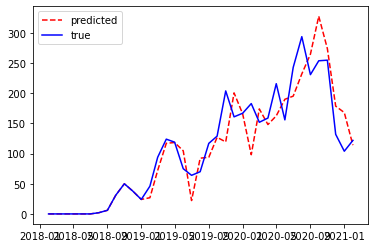

In [77]:
plt.plot(data.index, data.values[0:12].tolist()+predictions[:-1], linestyle = '--', color='red', label='predicted')
pyplot.plot(data, color='blue', label='true')
pyplot.legend()
pyplot.show()

In [64]:
# predictions
data.values[0:12].tolist()

[0, 0, 0, 0, 0, 0, 2, 6, 31, 50, 38, 24]

In [58]:
model.summary()

AttributeError: 'ARIMA' object has no attribute 'summary'